In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
##REad the dataset
df=pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

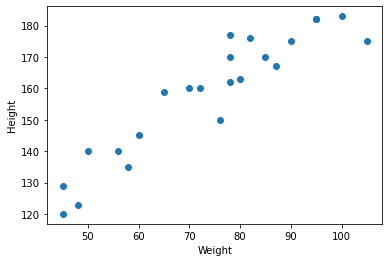

In [4]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [19]:
##divide our dataset into independent and dependent features
X=df[['Weight']] #making 2d dimensional
y=df['Height']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [21]:
y_train

12    175
1     135
13    183
5     162
2     123
11    182
20    129
3     145
4     160
18    150
16    140
21    140
22    160
7     175
10    176
14    170
19    167
6     163
Name: Height, dtype: int64

In [22]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

In [23]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [24]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train) #calculate zscore for each and every datapoint(zscore need mean and std)-fit_transform
# fit - calculate the meand and std
# transform - calculate zscore - for X-train
X_test=scaler.transform(X_test) 
#For test it will apply zscore take meand and std from the x_train. 
# why we doing this my model should not known aboyt the test train . It must know about only train data

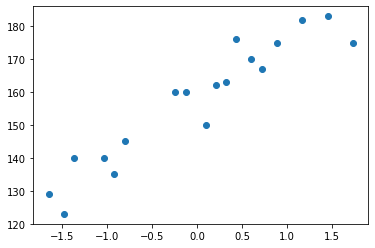

In [25]:
plt.scatter(X_train,y_train)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
regressor=LinearRegression()

In [37]:
regressor

LinearRegression()

In [12]:
X_train.head()

12    105
1      58
13    100
5      78
2      48
Name: Weight, dtype: int64

In [26]:
type(X_train)

numpy.ndarray

In [29]:
X_train.shape,X_test.shape

((18, 1), (5, 1))

In [32]:
X_train=np.array(X_train).reshape(-1,1)
X_test=np.array(X_test).reshape(-1,1)

In [33]:
X_train.shape,X_test.shape

((18, 1), (5, 1))

In [95]:
y_train.shape

(16,)

In [38]:
regressor.fit(X_train,y_train)

LinearRegression()

In [39]:
## coefficient and intercepts
print("Coefficient : ",regressor.coef_)
print("Intercept : ",regressor.intercept_)

Coefficient :  [17.03440872]
Intercept :  157.5


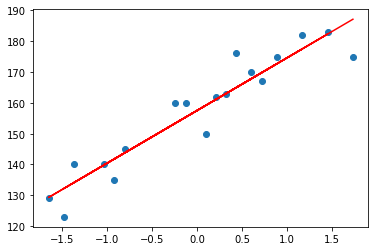

In [41]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),"r")

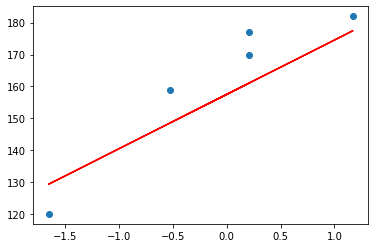

In [42]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),"r")

### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =65.4364 + 1.26(X_train)
          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =65.4364 + 1.26(X_test)

In [43]:
y_pred_test=regressor.predict(X_test)

In [52]:
y_test,y_pred_test

(15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64,
 array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]))

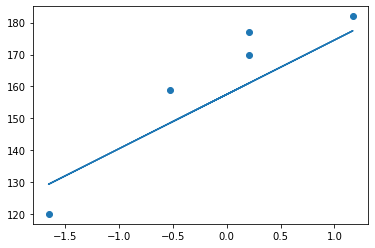

In [45]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test))

In [46]:
### Performance metrics

from sklearn.metrics import mean_squared_error,mean_absolute_error

In [47]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051654
9.822657814519227
10.477400726827076


In [48]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)

In [49]:
print(score)

0.7769869860423441


## R square 
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [50]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
print(score)

0.7769869860423441


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [51]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231254

In [53]:
#new Data point
scaled_weight=scaler.transform([[80]])
scaled_weight

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [54]:
# regressor.predict(scaler.transform([[75]]))
regressor.predict([scaled_weight[0]])

array([163.01076266])

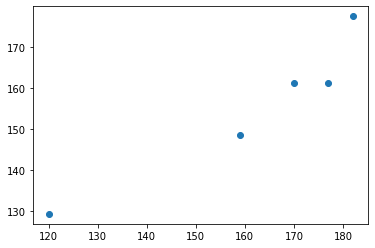

In [56]:
## Assumptions

## plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_test)



In [57]:
## Residuals
residuals=y_test-y_pred_test

residuals



15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

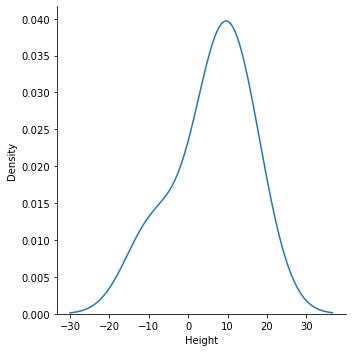

In [60]:
## Plot this residuals 
import seaborn as sns
sns.displot(residuals,kind="kde")



C:\Users\HP\AppData\Local\Temp\ipykernel_14500\3178572731.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<AxesSubplot:xlabel='Height', ylabel='Density'>

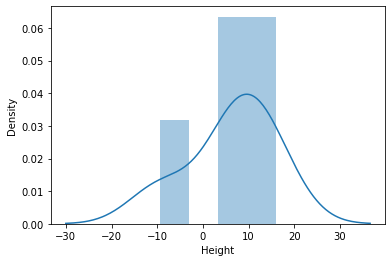

In [62]:
## Plot this residuals 
import seaborn as sns
sns.distplot(residuals,kde=True)



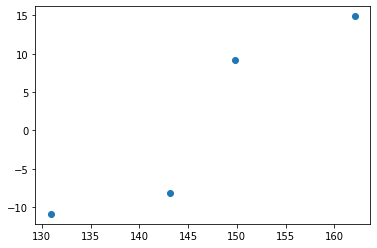

In [110]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred_test,residuals)

## Using OLS

In [111]:
import statsmodels.api as sm

In [112]:
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) 

In [115]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.008
Model:                            OLS   Adj. R-squared (uncentered):             -0.058
Method:                 Least Squares   F-statistic:                             0.1279
Date:                Mon, 01 Aug 2022   Prob (F-statistic):                       0.726
Time:                        16:01:23   Log-Likelihood:                         -104.31
No. Observations:                  16   AIC:                                      210.6
Df Residuals:                      15   BIC:                                      211.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\win10\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [116]:
regressor.coef_

array([15.14687925])